### Sales Prediction for Big Mart Outlets

The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and predict the sales of each product at a particular outlet.

Using this model, BigMart will try to understand the properties of products and outlets which play a key role in increasing sales.

Please note that the data may have missing values as some stores might not report all the data due to technical glitches. Hence, it will be required to treat them accordingly.

Try and Build Regression model using all the techniques of regression: Linear, Ridge, Lasso, Decision Tree and XGboost

In [1]:
# importing required data and libraries
import pandas as pd #for data preprocessing and manipulation
import numpy as np
import matplotlib.pyplot as plt  #for visualizing data
import seaborn as sns

In [2]:
# read the train data
data = pd.read_csv('Datasets/trainbigmart.csv')
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
#checking the data types of each feature
data.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [4]:
# check for the null values and explore shape as well
data.shape

(8523, 12)

In [5]:
#data summary
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [6]:
#checking for the total null values
data.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

There are only two variables with missing values – Item_Weight and Outlet_Size.

Since Item_Weight is a continuous variable, we can use either mean or median to impute the missing values. On the other hand, Outlet_Size is a categorical variable and hence we will replace the missing values by the mode of the column. You can try different methods to impute missing values as well.



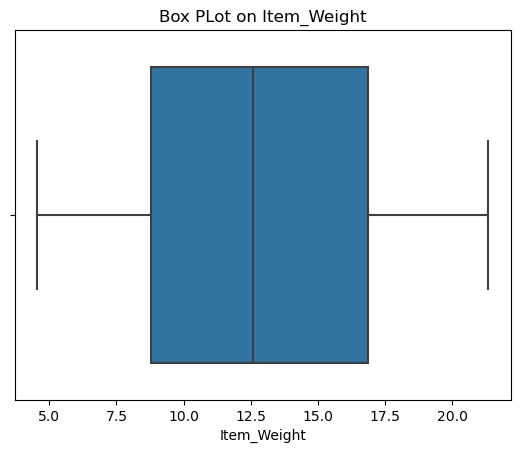

In [7]:
#create box plot on Item weight

sns.boxplot(x=data['Item_Weight'])
plt.title("Box PLot on Item_Weight")
plt.show()

In [8]:
# impute missing values in item weight by mean
x1 = data["Item_Weight"].mean()

data["Item_Weight"].fillna(x1, inplace = True)

# impute outlet size in training data by mode
x2 = data["Outlet_Size"].mode()[0]

data["Outlet_Size"].fillna(x2, inplace = True)

In [9]:
# check for the null values again
data.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

### Explore the categorical columns

In [10]:
data.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [11]:
data['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [12]:
#Rplacing the 'low fat' and 'LF' with 'Low Fat'
data['Item_Fat_Content'].replace(['low fat','LF'],'Low Fat', inplace = True)

#Rplacing the 'reg' with 'Regular'
data['Item_Fat_Content'].replace(['reg'],'Regular', inplace = True)

In [13]:
data['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

In [14]:
data['Item_Type'].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [15]:
data['Outlet_Identifier'].unique()

array(['OUT049', 'OUT018', 'OUT010', 'OUT013', 'OUT027', 'OUT045',
       'OUT017', 'OUT046', 'OUT035', 'OUT019'], dtype=object)

In [16]:
data['Outlet_Size'].unique()

array(['Medium', 'High', 'Small'], dtype=object)

In [17]:
data['Outlet_Location_Type'].unique()

array(['Tier 1', 'Tier 3', 'Tier 2'], dtype=object)

In [18]:
data['Outlet_Type'].unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

# EDA

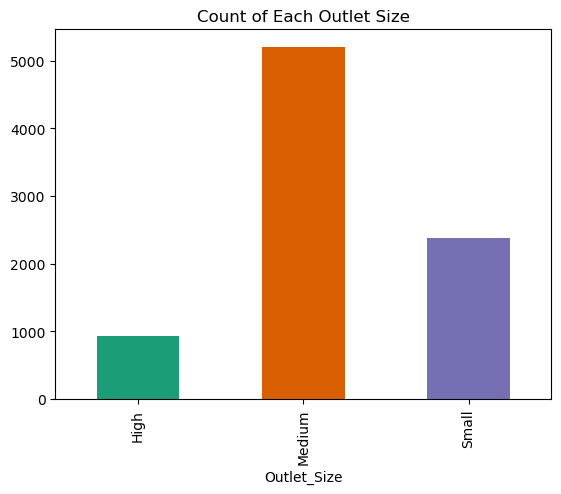

In [19]:
data.groupby('Outlet_Size').size().plot(kind='bar', color=sns.palettes.mpl_palette("Dark2"))
plt.title('Count of Each Outlet Size')
plt.show()

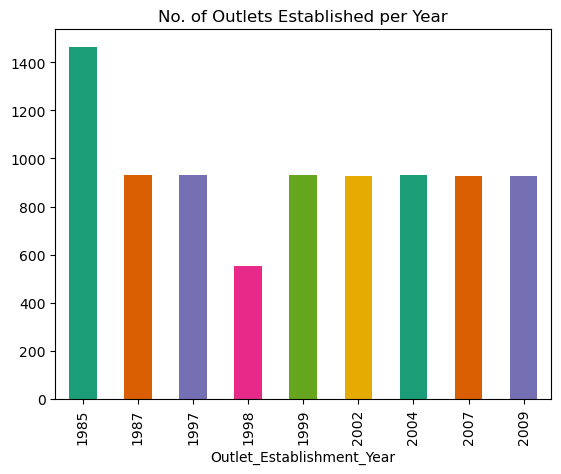

In [20]:
data.groupby('Outlet_Establishment_Year').size().plot(kind='bar',color=sns.palettes.mpl_palette("Dark2"))
plt.title('No. of Outlets Established per Year')
plt.show()

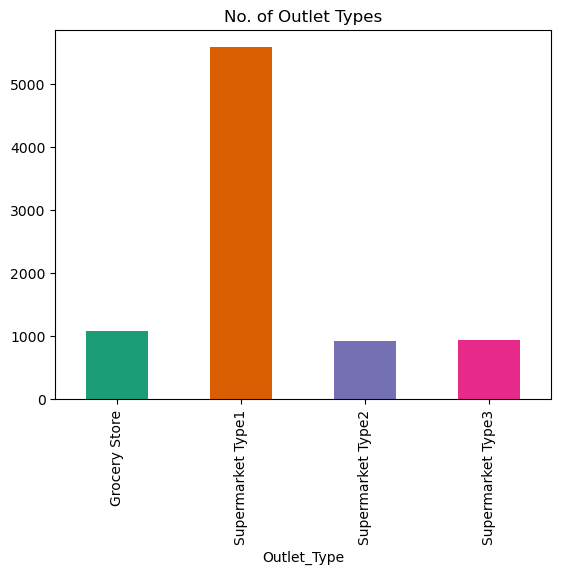

In [21]:
data.groupby('Outlet_Type').size().plot(kind='bar',color=sns.palettes.mpl_palette("Dark2"))
plt.title('No. of Outlet Types')
plt.show()

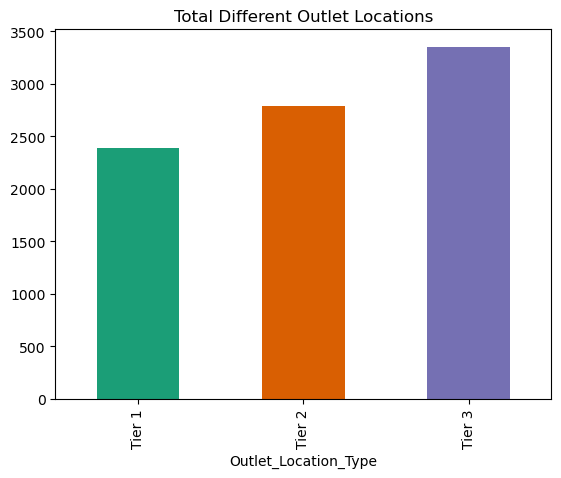

In [22]:
data.groupby('Outlet_Location_Type').size().plot(kind='bar',color=sns.palettes.mpl_palette("Dark2"))
plt.title('Total Different Outlet Locations')
plt.show()

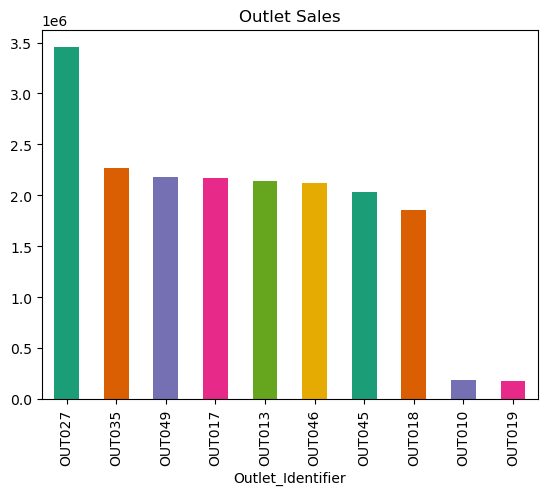

In [23]:
data.groupby(by=['Outlet_Identifier'])['Item_Outlet_Sales'].sum().sort_values(ascending=False).plot(kind='bar', color=sns.palettes.mpl_palette("Dark2"))
plt.title('Outlet Sales')
plt.show()

Encode the categorical variables

To check the categorical variables in the data, you can use the train_data.dtypes() function. This will give you a list of the data types against each variable. For the BigMart sales data, we have the following categorical variable –

Item_Fat_Content

Item_Type,

Outlet_Identifier

Outlet_Size,

Outlet_Location_Type, and

Outlet_Type

In [24]:
from sklearn.preprocessing import LabelEncoder
categorical_cols = ['Item_Fat_Content',
                    'Item_Type',
                    'Outlet_Identifier',
                    'Outlet_Size',
                    'Outlet_Location_Type',
                    'Outlet_Type']
le = LabelEncoder()
# apply le on categorical feature columns
data[categorical_cols] = data[categorical_cols].apply(lambda col: le.fit_transform(col))

In [25]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,DRC01,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,FDN15,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,FDX07,19.20,1,0.000000,6,182.0950,0,1998,1,2,0,732.3800
4,NCD19,8.93,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052


Explore categorical columns after label encoding


In [26]:
data.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content               int32
Item_Visibility              float64
Item_Type                      int32
Item_MRP                     float64
Outlet_Identifier              int32
Outlet_Establishment_Year      int64
Outlet_Size                    int32
Outlet_Location_Type           int32
Outlet_Type                    int32
Item_Outlet_Sales            float64
dtype: object

## Categrical Columns After Encoding:

In [27]:
data['Item_Fat_Content'].unique()

array([0, 1])

In [28]:
data['Item_Type'].unique()

array([ 4, 14, 10,  6,  9,  0, 13,  5,  2,  8,  7,  3,  1, 15, 11, 12])

In [29]:
data['Outlet_Identifier'].unique()

array([9, 3, 0, 1, 5, 7, 2, 8, 6, 4])

In [30]:
data['Outlet_Size'].unique()

array([1, 0, 2])

In [31]:
data['Outlet_Location_Type'].unique()

array([0, 2, 1])

In [32]:
data['Outlet_Type'].unique()

array([1, 2, 0, 3])

### Scale the data:

So far we have taken care of the missing values and the categorical (string) variables in the data. Next we will work with the continuous variables. Often the continuous variables in the data have different scales, for instance, a variable V1 can have a range from 0 to 1 while another variable can have a range from 0-1000.

Based on the type of model you are building, you will have to normalize the data in such a way that the range of all the variables is almost similar

In [33]:
#apply standard scaler on Item MRP column only
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()#instantiation

data['Item_MRP'] = scaler.fit_transform(data[['Item_MRP']]) #result is in form of array

### Model Building

Now that we are done with the basic pre-processing steps, we can go ahead and build simple machine learning models over this data. We will try two models here – Linear Regression to predict the sales.

To compare the performance of the models, we will create a validation set (or test set). Here I have randomly split the data into two parts using the train_test_split() function, such that the validation set holds 25% of the data points while the train set has 75%

In [34]:
# importing libraries for model building
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
import xgboost as xgb # XGBoost
from sklearn.model_selection import RepeatedKFold
from sklearn import metrics

#To ignore warnigs
import warnings
warnings.filterwarnings('ignore')

In [35]:
# separate the independent and target variable
x = data.drop(['Item_Identifier','Item_Outlet_Sales'], axis=1).values
y = data['Item_Outlet_Sales'].values

In [36]:
# randomly split the data
from sklearn.model_selection import train_test_split #split the data into train and test sets

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.25, random_state=42)
# shape of train and test splits
print('Train Data Size(x):', x_train.shape)
print()
print('Test Data Size(x):', x_test.shape)

Train Data Size(x): (6392, 10)

Test Data Size(x): (2131, 10)


GO ahead and perfom model building using Multiple methods. Feel Free to perform any additional preprocessing

# 1. Linear Regression

In [37]:
#instantiate regression
lin_reg = LinearRegression()

#fitting the model
lin_reg.fit(x_train,y_train)

LinearRegression()

In [38]:
lin_reg.intercept_

2754.930710739892

In [39]:
lin_reg.coef_

array([-2.33262509e+00,  7.85441689e+01, -1.53860170e+03,  4.63823786e-03,
        9.75845734e+02,  6.37556286e+01, -5.81154325e-01, -3.54104782e+02,
       -2.08707737e+02,  8.69150566e+02])

In [40]:
o = data.drop(['Item_Identifier','Item_Outlet_Sales'], axis=1)
pd.DataFrame(lin_reg.coef_,index = o.columns)

,0
Item_Weight,-2.332625
Item_Fat_Content,78.544169
Item_Visibility,-1538.601699
Item_Type,0.004638
Item_MRP,975.845734
Outlet_Identifier,63.755629
Outlet_Establishment_Year,-0.581154
Outlet_Size,-354.104782
Outlet_Location_Type,-208.707737
Outlet_Type,869.150566


In [41]:
#r squared (Test data):  coeff of determination
lin_reg.score(x_test,y_test)

0.5113306011955054

In [42]:
#r squared (Train data):
lin_reg.score(x_train,y_train)

0.5093456390010637

In [43]:
#predictions on testing and training set

y_test_predict_linr = lin_reg.predict(x_test)
y_train_predict_linr = lin_reg.predict(x_train)

In [44]:
print("Liear Regressor Model Performance: \n")

print("------------------Training Performance:----------------")
print("Mean Absolute Error        :",metrics.mean_absolute_error(y_train,y_train_predict_linr))
print("Mean Squared Error         :",metrics.mean_squared_error(y_train,y_train_predict_linr))
print("Root Mean Squared Error    :",np.sqrt(metrics.mean_squared_error(y_train,y_train_predict_linr)))
print("R2 Score                   :",metrics.r2_score(y_train,y_train_predict_linr))

print("\n-----------------Testing Performance:-----------------")
print("Mean Absolute Error        :",metrics.mean_absolute_error(y_test,y_test_predict_linr))
print("Mean Squared Error         :",metrics.mean_squared_error(y_test,y_test_predict_linr))
print("Root Mean Squared Error    :",np.sqrt(metrics.mean_squared_error(y_test,y_test_predict_linr)))
print("R2 Score                   :",metrics.r2_score(y_test,y_test_predict_linr))

Liear Regressor Model Performance: 

------------------Training Performance:----------------
Mean Absolute Error        : 908.197116480313
Mean Squared Error         : 1452069.8476091356
Root Mean Squared Error    : 1205.018608822758
R2 Score                   : 0.5093456390010637

-----------------Testing Performance:-----------------
Mean Absolute Error        : 866.3279387458962
Mean Squared Error         : 1348227.7725477328
Root Mean Squared Error    : 1161.132108137456
R2 Score                   : 0.5113306011955054


## Checking Multicollineaarity:-

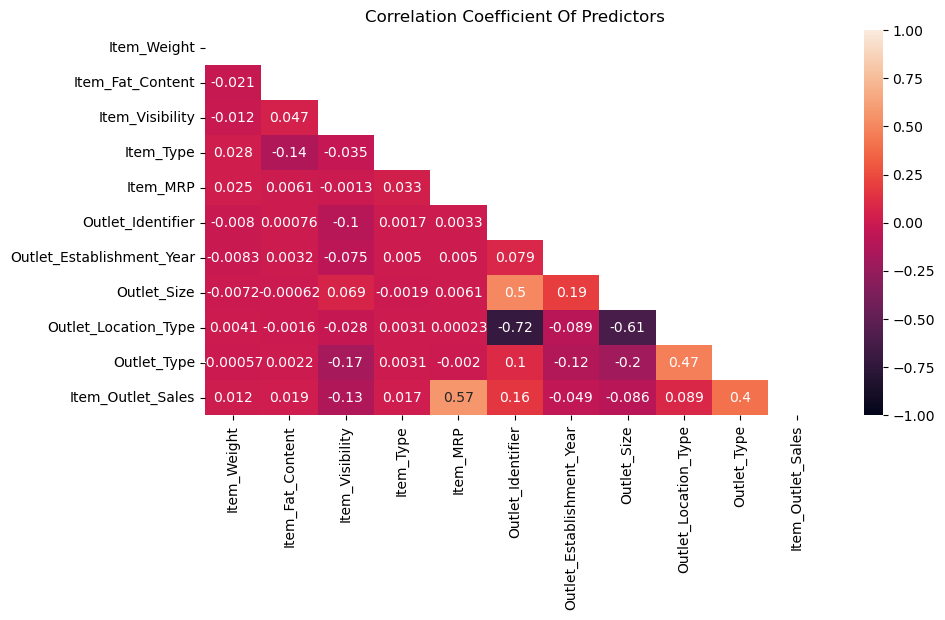

In [45]:
# import libraries
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# setting figure size
plt.figure(figsize=(10,5))

# Generating a mask to onlyshow the bottom triangle
mask = np.triu(np.ones_like(data.corr(), dtype=bool))

# generating heatmap
sns.heatmap(data.corr(), annot=True, mask=mask, vmin=-1, vmax=1)
plt.title('Correlation Coefficient Of Predictors')
plt.show()

In [46]:
#Conventional OLS method

import statsmodels.formula.api as smf

reg_all = smf.ols(formula='Item_Outlet_Sales ~ Item_Weight + Item_Fat_Content + Item_Visibility + Item_Type + Item_MRP + Outlet_Identifier + Outlet_Establishment_Year + Outlet_Size + Outlet_Location_Type + Outlet_Type',data=data).fit()
reg_all.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Item_Outlet_Sales   R-squared:                       0.510
Model:                            OLS   Adj. R-squared:                  0.510
Method:                 Least Squares   F-statistic:                     887.3
Date:                Sun, 27 Aug 2023   Prob (F-statistic):               0.00
Time:                        16:23:24   Log-Likelihood:                -72480.
No. Observations:                8523   AIC:                         1.450e+05
Df Residuals:                    8512   BIC:                         1.451e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                  1236.5071   3203.914      0.386      0.700   -5043.941    7516.956
Item_Weight                  -0.8253      3.066     -0.269      0.788      -6.834       5.184
Item_Fat_Content             56.0797     27.387      2.048      0.041       2.394     109.766
Item_Visibility           -1392.0761    258.809     -5.379      0.000   -1899.405    -884.747
Item_Type                    -0.8425      3.109     -0.271      0.786      -6.936       5.251
Item_MRP                    970.5440     12.954     74.921      0.000     945.151     995.937
Outlet_Identifier            59.8042      9.292      6.436      0.000      41.591      78.018
Outlet_Establishment_Year     0.1694      1.608      0.105      0.916      -2.983       3.322
Outlet_Size                -339.2041     28.227    -12.017      0.000    -394.537    -283.872
Outlet_Location_Type       -222.4058     38.565     -5.767      0.000    -298.003    -146.808
Outlet_Type                 880.4703     26.435     33.307      0.000     828.651     932.289
==============================================================================
Omnibus:                      856.913   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1786.752
Skew:                           0.643   Prob(JB):                         0.00
Kurtosis:                       4.838   Cond. No.                     4.95e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.95e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### We can see that the columns Item_Weight, Item_Type, and Outlet_Establishment_Year are having high collinearity. So, removing these features and checking the score again.

In [47]:
#Conventional OLS method

import statsmodels.formula.api as smf

reg_all = smf.ols(formula='Item_Outlet_Sales ~ Item_Fat_Content + Item_Visibility + Item_MRP + Outlet_Identifier + Outlet_Size + Outlet_Location_Type + Outlet_Type',data=data).fit()
reg_all.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Item_Outlet_Sales   R-squared:                       0.510
Model:                            OLS   Adj. R-squared:                  0.510
Method:                 Least Squares   F-statistic:                     1268.
Date:                Sun, 27 Aug 2023   Prob (F-statistic):               0.00
Time:                        16:23:24   Log-Likelihood:                -72480.
No. Observations:                8523   AIC:                         1.450e+05
Df Residuals:                    8515   BIC:                         1.450e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             1556.3937     77.891     19.982      0.000    1403.708    1709.079
Item_Fat_Content        57.2853     27.115      2.113      0.035       4.134     110.437
Item_Visibility      -1392.2509    257.093     -5.415      0.000   -1896.216    -888.285
Item_MRP               970.3413     12.941     74.983      0.000     944.974     995.709
Outlet_Identifier       59.9231      9.235      6.489      0.000      41.821      78.025
Outlet_Size           -338.6004     27.675    -12.235      0.000    -392.850    -284.350
Outlet_Location_Type  -221.8051     38.149     -5.814      0.000    -296.586    -147.025
Outlet_Type            880.0003     26.031     33.806      0.000     828.973     931.027
==============================================================================
Omnibus:                      856.177   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1784.124
Skew:                           0.643   Prob(JB):                         0.00
Kurtosis:                       4.836   Cond. No.                         117.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# 2. Ridge Regression

In [48]:
ridge = Ridge(alpha=1)
ridge.fit(x_train,y_train)

Ridge(alpha=1)

In [49]:
#R2 score
ridge.score(x_test,y_test)

#test score

0.5114210293778001

In [50]:
#R2 score
ridge.score(x_train,y_train)

#train score

0.509338675258271

In [51]:
y_pred = ridge.predict(x_test)

#margin of error-test data
from sklearn.metrics import mean_squared_error as mse

mse = mse(y_test,y_pred)
rmse = mse**0.5
rmse

1161.0246695254173

In [52]:
y_pred_train = ridge.predict(x_train)

#margin of error-train data
from sklearn.metrics import mean_squared_error as mse

mse = mse(y_train,y_pred_train)
rmse = mse**0.5
rmse

1205.0271600663066

In [53]:
ridge.intercept_

2648.0187513660044

In [54]:
ridge.coef_

array([-2.31666496e+00,  7.81032796e+01, -1.44740487e+03,  4.54385775e-02,
        9.75696090e+02,  6.41018628e+01, -5.31808926e-01, -3.54776662e+02,
       -2.08099469e+02,  8.69510810e+02])

In [55]:
o = data.drop(['Item_Identifier','Item_Outlet_Sales'],axis=1)
o.columns

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Identifier', 'Outlet_Establishment_Year',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [56]:
pd.DataFrame(ridge.coef_,index=o.columns)

,0
Item_Weight,-2.316665
Item_Fat_Content,78.103280
Item_Visibility,-1447.404875
Item_Type,0.045439
Item_MRP,975.696090
Outlet_Identifier,64.101863
Outlet_Establishment_Year,-0.531809
Outlet_Size,-354.776662
Outlet_Location_Type,-208.099469
Outlet_Type,869.510810


## RidgeCV

In [57]:
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import RidgeCV
from numpy import arange

#instantiate repeated k-fold
rcv = RepeatedKFold(n_splits=10,n_repeats=3,random_state=42)

#instantiate ridgecv
ridgecv = RidgeCV(alphas=arange(0.1, 1, 0.01), cv=rcv, scoring='neg_mean_absolute_error')

#fitting ridge model
ridgecv.fit(x_train, y_train)

RidgeCV(alphas=array([0.1 , 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 ,
       0.21, 0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31,
       0.32, 0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42,
       0.43, 0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53,
       0.54, 0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64,
       0.65, 0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75,
       0.76, 0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86,
       0.87, 0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97,
       0.98, 0.99]),
        cv=RepeatedKFold(n_repeats=3, n_splits=10, random_state=42),
        scoring='neg_mean_absolute_error')

In [58]:
ridgecv.alpha_

0.9899999999999995

In [59]:
ridgecv.intercept_

2649.013681315689

In [60]:
ridgecv.coef_

array([-2.31681596e+00,  7.81074525e+01, -1.44826276e+03,  4.50545809e-02,
        9.75697591e+02,  6.40984956e+01, -5.32267241e-01, -3.54770574e+02,
       -2.08105790e+02,  8.69507845e+02])

In [61]:
o = data.drop(['Item_Identifier','Item_Outlet_Sales'], axis=1)
pd.DataFrame(ridgecv.coef_,index = o.columns)

,0
Item_Weight,-2.316816
Item_Fat_Content,78.107452
Item_Visibility,-1448.262756
Item_Type,0.045055
Item_MRP,975.697591
Outlet_Identifier,64.098496
Outlet_Establishment_Year,-0.532267
Outlet_Size,-354.770574
Outlet_Location_Type,-208.105790
Outlet_Type,869.507845


In [62]:
#r squared (Test data):  coeff of determination
ridgecv.score(x_test,y_test)

0.5114202525136289

In [63]:
#r squared (Train data):
ridgecv.score(x_train,y_train)

0.5093388057260793

In [64]:
#predictions on the training and testing sets

y_test_predict_rr = ridgecv.predict(x_test)
y_train_predict_rr = ridgecv.predict(x_train)

In [65]:
print("Ridge Regressor Model Performance: \n")

print("------------------Training Performance:----------------")
print("Mean Absolute Error        :",metrics.mean_absolute_error(y_train,y_train_predict_rr))
print("Mean Squared Error         :",metrics.mean_squared_error(y_train,y_train_predict_rr))
print("Root Mean Squared Error    :",np.sqrt(metrics.mean_squared_error(y_train,y_train_predict_rr)))
print("R2 Score                   :",metrics.r2_score(y_train,y_train_predict_rr))

print("\n-----------------Testing Performance:-----------------")
print("Mean Absolute Error        :",metrics.mean_absolute_error(y_test,y_test_predict_rr))
print("Mean Squared Error         :",metrics.mean_squared_error(y_test,y_test_predict_rr))
print("Root Mean Squared Error    :",np.sqrt(metrics.mean_squared_error(y_test,y_test_predict_rr)))
print("R2 Score                   :",metrics.r2_score(y_test,y_test_predict_rr))

Ridge Regressor Model Performance: 

------------------Training Performance:----------------
Mean Absolute Error        : 908.1786893571506
Mean Squared Error         : 1452090.070383769
Root Mean Squared Error    : 1205.0269998567537
R2 Score                   : 0.5093388057260793

-----------------Testing Performance:-----------------
Mean Absolute Error        : 866.2590346019047
Mean Squared Error         : 1347980.4265972085
Root Mean Squared Error    : 1161.0255925677127
R2 Score                   : 0.5114202525136289


# 3. Lasso Regression

In [66]:
lasso = Lasso(alpha=1)
lasso.fit(x_train,y_train)

Lasso(alpha=1)

In [67]:
#R2 score
lasso.score(x_test,y_test)
#test score

0.5116762174830978

In [68]:
#R2 score
lasso.score(x_train,y_train)

#train score

0.5092036566082965

In [69]:
y_pred = lasso.predict(x_test)

#margin of error-test data
from sklearn.metrics import mean_squared_error as mse

mse = mse(y_test,y_pred)
rmse = mse**0.5
rmse

1160.7214243994852

In [70]:
y_pred_train = lasso.predict(x_train)

#margin of error-train data
from sklearn.metrics import mean_squared_error as mse

mse = mse(y_train,y_pred_train)
rmse = mse**0.5
rmse

1205.1929464659809

In [71]:
lasso.coef_

array([-2.20060389e+00,  7.24194771e+01, -1.14183370e+03,  5.80023096e-02,
        9.74809870e+02,  6.66774885e+01, -4.42358329e-01, -3.51373287e+02,
       -1.96391089e+02,  8.65699053e+02])

In [72]:
o = data.drop(['Item_Identifier','Item_Outlet_Sales'],axis=1)
o.columns

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Identifier', 'Outlet_Establishment_Year',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [73]:
pd.DataFrame(lasso.coef_,index=o.columns)

,0
Item_Weight,-2.200604
Item_Fat_Content,72.419477
Item_Visibility,-1141.833705
Item_Type,0.058002
Item_MRP,974.809870
Outlet_Identifier,66.677488
Outlet_Establishment_Year,-0.442358
Outlet_Size,-351.373287
Outlet_Location_Type,-196.391089
Outlet_Type,865.699053


## LassoCV

In [74]:
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import LassoCV
from numpy import arange

#instantiate repeated k-fold
lcv = RepeatedKFold(n_splits=50,n_repeats=3,random_state=42)

#instantiate LassoCV
lasso = LassoCV(alphas=arange(0,1,0.01), cv=lcv) #default scoring is r squared

#fitting lasso model
lasso.fit(x_train,y_train)

LassoCV(alphas=array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99]),
        cv=RepeatedKFold(n_repeats=3, n_splits=50, random_state=42))

In [75]:
lasso.alpha_

0.05

In [76]:
lasso.intercept_

2738.4438850190572

In [77]:
lasso.coef_

array([-2.32602308e+00,  7.82379479e+01, -1.51876341e+03,  7.30619443e-03,
        9.75793934e+02,  6.39019239e+01, -5.74221946e-01, -3.53967919e+02,
       -2.08091015e+02,  8.68977528e+02])

In [78]:
o = data.drop(['Item_Identifier','Item_Outlet_Sales'], axis=1)
pd.DataFrame(lasso.coef_,index = o.columns)

,0
Item_Weight,-2.326023
Item_Fat_Content,78.237948
Item_Visibility,-1518.763410
Item_Type,0.007306
Item_MRP,975.793934
Outlet_Identifier,63.901924
Outlet_Establishment_Year,-0.574222
Outlet_Size,-353.967919
Outlet_Location_Type,-208.091015
Outlet_Type,868.977528


In [79]:
#r squared (Test data):  coeff of determination
lasso.score(x_test,y_test)

0.5113554986442169

In [80]:
#r squared (Train data):
lasso.score(x_train,y_train)

0.5093452839995074

In [81]:
#predictions on the training and testing sets

y_test_predict_lr = lasso.predict(x_test)
y_train_predict_lr = lasso.predict(x_train)

In [82]:
from sklearn import metrics
print("Lasso Regressor Model Performance: \n")

print("------------------Training Performance:---------------")
print("Mean Absolute Error        :",metrics.mean_absolute_error(y_train,y_train_predict_lr))
print("Mean Squared Error         :",metrics.mean_squared_error(y_train,y_train_predict_lr))
print("Root Mean Squared Error    :",np.sqrt(metrics.mean_squared_error(y_train,y_train_predict_lr)))
print("R2 Score                   :",metrics.r2_score(y_train,y_train_predict_lr))

print("\n-----------------Testing Performance:-----------------")
print("Mean Absolute Error        :",metrics.mean_absolute_error(y_test,y_test_predict_lr))
print("Mean Squared Error         :",metrics.mean_squared_error(y_test,y_test_predict_lr))
print("Root Mean Squared Error    :",np.sqrt(metrics.mean_squared_error(y_test,y_test_predict_lr)))
print("R2 Score                   :",metrics.r2_score(y_test,y_test_predict_lr))

Lasso Regressor Model Performance: 

------------------Training Performance:---------------
Mean Absolute Error        : 908.1893795765371
Mean Squared Error         : 1452070.8982205165
Root Mean Squared Error    : 1205.0190447542795
R2 Score                   : 0.5093452839995074

-----------------Testing Performance:-----------------
Mean Absolute Error        : 866.3045373411849
Mean Squared Error         : 1348159.0810522137
Root Mean Squared Error    : 1161.1025282257435
R2 Score                   : 0.5113554986442169


# 4. Decision Tree Regression

In [83]:
#instantiating the decison tree model
reg_dt = DecisionTreeRegressor(random_state = 42)

#fitting the mode
reg_dt.fit(x_train, y_train)

DecisionTreeRegressor(random_state=42)

In [84]:
#making predictions on the training and testing sets

y_train_predict_dtr = reg_dt.predict(x_train)
y_test_predict_dtr = reg_dt.predict(x_test)

In [85]:
from sklearn import metrics
print("Decision Tree Regressor Model Performance: \n")

print("------------------Training Performance:---------------")
print("Mean Absolute Error        :",metrics.mean_absolute_error(y_train,y_train_predict_dtr))
print("Mean Squared Error         :",metrics.mean_squared_error(y_train,y_train_predict_dtr))
print("Root Mean Squared Error    :",np.sqrt(metrics.mean_squared_error(y_train,y_train_predict_dtr)))
print("R2 Score                   :",metrics.r2_score(y_train,y_train_predict_dtr))

print("\n-----------------Testing Performance:-----------------")
print("Mean Absolute Error        :",metrics.mean_absolute_error(y_test,y_test_predict_dtr))
print("Mean Squared Error         :",metrics.mean_squared_error(y_test,y_test_predict_dtr))
print("Root Mean Squared Error    :",np.sqrt(metrics.mean_squared_error(y_test,y_test_predict_dtr)))
print("R2 Score                   :",metrics.r2_score(y_test,y_test_predict_dtr))

Decision Tree Regressor Model Performance: 

------------------Training Performance:---------------
Mean Absolute Error        : 1.0671480386885109e-16
Mean Squared Error         : 2.4264137179864312e-29
Root Mean Squared Error    : 4.925864104892086e-15
R2 Score                   : 1.0

-----------------Testing Performance:-----------------
Mean Absolute Error        : 1063.6094075082121
Mean Squared Error         : 2371977.9455259773
Root Mean Squared Error    : 1540.1227046979009
R2 Score                   : 0.1402691294310494


## Tuning Parameters Using GridSearchCV:-

In [86]:
params = {'max_depth':[2,3,4,5],
         'min_samples_leaf':[5,10,20,50],
         'min_samples_split':[2,5,10,20]
         }

In [87]:
reg_dt = DecisionTreeRegressor()

from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(estimator=reg_dt,
                          param_grid=params,
                          cv=5,
                          scoring='neg_mean_squared_error')

In [88]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [2, 3, 4, 5],
                         'min_samples_leaf': [5, 10, 20, 50],
                         'min_samples_split': [2, 5, 10, 20]},
             scoring='neg_mean_squared_error')

In [89]:
grid_search.best_params_

{'max_depth': 5, 'min_samples_leaf': 20, 'min_samples_split': 2}

In [90]:
params2 = {'max_depth':range(5,10),
         'min_samples_leaf':range(10,30),
         'min_samples_split':range(2,5)
          }

In [91]:
reg_dt = DecisionTreeRegressor()

from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(estimator=reg_dt,
                          param_grid=params2,
                          cv=5,
                          scoring='neg_mean_squared_error')

In [92]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': range(5, 10),
                         'min_samples_leaf': range(10, 30),
                         'min_samples_split': range(2, 5)},
             scoring='neg_mean_squared_error')

In [93]:
grid_search.best_params_

{'max_depth': 5, 'min_samples_leaf': 21, 'min_samples_split': 2}

In [94]:
reg_dt_tuned = DecisionTreeRegressor(max_depth= 5,
                                     min_samples_leaf= 21,
                                     min_samples_split= 2
                                    )
reg_dt_tuned = reg_dt_tuned.fit(x_train,y_train)

In [95]:
y_test_predict_dtr = reg_dt_tuned.predict(x_test)
y_train_predict_dtr = reg_dt_tuned.predict(x_train)

In [96]:
from sklearn import metrics
print("Decision Tree Regressor Model Performance: \n")

print("------------------Training Performance:---------------")
print("Mean Absolute Error        :",metrics.mean_absolute_error(y_train,y_train_predict_dtr))
print("Mean Squared Error         :",metrics.mean_squared_error(y_train,y_train_predict_dtr))
print("Root Mean Squared Error    :",np.sqrt(metrics.mean_squared_error(y_train,y_train_predict_dtr)))
print("R2 Score                   :",metrics.r2_score(y_train,y_train_predict_dtr))

print("\n-----------------Testing Performance:-----------------")
print("Mean Absolute Error        :",metrics.mean_absolute_error(y_test,y_test_predict_dtr))
print("Mean Squared Error         :",metrics.mean_squared_error(y_test,y_test_predict_dtr))
print("Root Mean Squared Error    :",np.sqrt(metrics.mean_squared_error(y_test,y_test_predict_dtr)))
print("R2 Score                   :",metrics.r2_score(y_test,y_test_predict_dtr))

Decision Tree Regressor Model Performance: 

------------------Training Performance:---------------
Mean Absolute Error        : 762.7820145915771
Mean Squared Error         : 1172791.623863446
Root Mean Squared Error    : 1082.9550424017823
R2 Score                   : 0.6037137430137464

-----------------Testing Performance:-----------------
Mean Absolute Error        : 737.1942016272791
Mean Squared Error         : 1114784.0955051745
Root Mean Squared Error    : 1055.833365406291
R2 Score                   : 0.5959429965473144


# 5. XGBoost

In [97]:
#instantiating model
reg_xgb = xgb.XGBRegressor(objective='reg:squarederror',
                           eval_metric='rmsle',
                           seed=42,
                           use_label_encoder=False)
reg_xgb.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric='rmsle', feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [98]:
#making predictions on training and testing sets

y_test_predict_xgb = reg_xgb.predict(x_test)

y_train_predict_xgb = reg_xgb.predict(x_train)

In [99]:
from sklearn import metrics
print("XGBoost Regressor Model Performance: \n")

print("------------------Training Performance:---------------")
print("Mean Absolute Error        :",metrics.mean_absolute_error(y_train,y_train_predict_xgb))
print("Mean Squared Error         :",metrics.mean_squared_error(y_train,y_train_predict_xgb))
print("Root Mean Squared Error    :",np.sqrt(metrics.mean_squared_error(y_train,y_train_predict_xgb)))
print("R2 Score                   :",metrics.r2_score(y_train,y_train_predict_xgb))

print("\n-----------------Testing Performance:-----------------")
print("Mean Absolute Error        :",metrics.mean_absolute_error(y_test,y_test_predict_xgb))
print("Mean Squared Error         :",metrics.mean_squared_error(y_test,y_test_predict_xgb))
print("Root Mean Squared Error    :",np.sqrt(metrics.mean_squared_error(y_test,y_test_predict_xgb)))
print("R2 Score                   :",metrics.r2_score(y_test,y_test_predict_xgb))

XGBoost Regressor Model Performance: 

------------------Training Performance:---------------
Mean Absolute Error        : 466.77919226239464
Mean Squared Error         : 422275.65512906836
Root Mean Squared Error    : 649.8274041074817
R2 Score                   : 0.8573130679120531

-----------------Testing Performance:-----------------
Mean Absolute Error        : 782.4652454447307
Mean Squared Error         : 1269402.6259282914
Root Mean Squared Error    : 1126.677693898433
R2 Score                   : 0.5399010236371147


## Tuning Round-1 

In [100]:
params = {
    "max_depth" : [3,4,5],
    'learning_rate' : [0.1,0.01,0.05],
    'gamma' : [0,0.25,1.0] ,
    'scale_pos_weight' : [1,3,5],
    'reg_lambda' : [0,1.0,10.0],
    'colsample_bytree' : [0.5,0.75,0.9],
    'subsample' : [0.5,0.75,0.9]
}

from sklearn.model_selection import GridSearchCV

optimal_params = GridSearchCV(estimator=xgb.XGBRegressor(objective='reg:squarederror',
                                                          seed=42,
                                                          use_label_encoder=False),
                              param_grid=params,
                              scoring='neg_mean_absolute_error',
                              verbose=0,
                              cv=3
                             )

optimal_params.fit(x_train,y_train,eval_metric='rmsle', eval_set=[(x_test,y_test)], verbose=False)


GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=None, ...),
             param_grid={'colsample_bytree': [0.5, 0.75, 0.9],
                         'gamma': [0, 0.25, 1.0],
                         'learning_rate': [0.1, 0.01, 0.05],
                         'max_depth': [3, 4, 5], 'reg_lambda': [0, 1.0, 10.0],
                         'scale_pos_weight': [1, 3, 5],
                         'subsample': [0.5, 0.75, 0.9]},
             scoring='neg_mean_absolute_error')

In [101]:
optimal_params.best_params_

{'colsample_bytree': 0.9,
 'gamma': 0,
 'learning_rate': 0.05,
 'max_depth': 4,
 'reg_lambda': 10.0,
 'scale_pos_weight': 1,
 'subsample': 0.9}

## Tuning Round-2

In [102]:
params2 = {
    "max_depth" : [4],
    'learning_rate' : [0.05,0.06,0.07,0.08],
    'gamma' : [0] ,
    'scale_pos_weight' : [1],
    'reg_lambda' : [10,20,30,40,50],
    'colsample_bytree' : [0.9],
    'subsample' : [0.9]
}

from sklearn.model_selection import GridSearchCV

optimal_params = GridSearchCV(estimator=xgb.XGBRegressor(objective='reg:squarederror',
                                                          seed=42,
                                                          use_label_encoder=False),
                              param_grid=params2,
                              scoring='neg_mean_absolute_error',
                              verbose=0,
                              cv=3
                             )

optimal_params.fit(x_train,y_train,eval_metric='rmsle', eval_set=[(x_test,y_test)], verbose=False)


GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=None, ...),
             param_grid={'colsample_bytree': [0.9], 'gamma': [0],
                         'learning_rate': [0.05, 0.06, 0.07, 0.08],
                         'max_depth': [4], 'reg_lambda': [10, 20, 30, 40, 50],
                         'scale_pos_weight': [1], 'subsample': [0.9]},
             scoring='neg_mean_absolute_error')

In [103]:
optimal_params.best_params_

{'colsample_bytree': 0.9,
 'gamma': 0,
 'learning_rate': 0.05,
 'max_depth': 4,
 'reg_lambda': 50,
 'scale_pos_weight': 1,
 'subsample': 0.9}

# Tuning Round-3

In [104]:
params3 = {
    "max_depth" : [4],
    'learning_rate' : [0.05],
    'gamma' : [0] ,
    'scale_pos_weight' : [1],
    'reg_lambda' : [50,60,100],
    'colsample_bytree' : [0.9],
    'subsample' : [0.9]
}

from sklearn.model_selection import GridSearchCV

optimal_params = GridSearchCV(estimator=xgb.XGBRegressor(objective='reg:squarederror',
                                                          seed=42,
                                                          use_label_encoder=False),
                              param_grid=params3,
                              scoring='neg_mean_absolute_error',
                              verbose=0,
                              cv=3
                             )

optimal_params.fit(x_train,y_train,eval_metric='rmsle', eval_set=[(x_test,y_test)], verbose=False)
optimal_params.best_params_

{'colsample_bytree': 0.9,
 'gamma': 0,
 'learning_rate': 0.05,
 'max_depth': 4,
 'reg_lambda': 60,
 'scale_pos_weight': 1,
 'subsample': 0.9}

# Final Params:

- colsample_bytree : 0.9,
- gamma : 0,
- learning_rate : 0.05,
- max_depth : 4,
- reg_lambda : 60,
- scale_pos_weight : 1,
- subsample : 0.9}

# Building the Model with Tuned Parameters:

In [105]:
reg_xgb = xgb.XGBRegressor(seed=42,
                        objective='reg:squarederror',
                        gamma=0,
                        learning_rate=0.05,
                        max_depth=4,
                        reg_lambda=60,
                        scale_pos_weight=1,
                        subsample=0.9,
                        colsample_bytree=0.9,
                        use_label_encoder=False)
reg_xgb.fit(x_train,
            y_train,
            verbose=True,
            early_stopping_rounds=10,
            eval_metric='rmsle',
            eval_set=[(x_test, y_test)])

[0]	validation_0-rmsle:2.92560
[1]	validation_0-rmsle:2.28421
[2]	validation_0-rmsle:1.89980
[3]	validation_0-rmsle:1.65425
[4]	validation_0-rmsle:1.47437
[5]	validation_0-rmsle:1.33143
[6]	validation_0-rmsle:1.21117
[7]	validation_0-rmsle:1.11608
[8]	validation_0-rmsle:1.03587
[9]	validation_0-rmsle:0.96795
[10]	validation_0-rmsle:0.91048
[11]	validation_0-rmsle:0.85500
[12]	validation_0-rmsle:0.80040
[13]	validation_0-rmsle:0.76595
[14]	validation_0-rmsle:0.73625
[15]	validation_0-rmsle:0.70314
[16]	validation_0-rmsle:0.67899
[17]	validation_0-rmsle:0.65841
[18]	validation_0-rmsle:0.64070
[19]	validation_0-rmsle:0.62637
[20]	validation_0-rmsle:0.61351
[21]	validation_0-rmsle:0.60249
[22]	validation_0-rmsle:0.59282
[23]	validation_0-rmsle:0.58291
[24]	validation_0-rmsle:0.57542
[25]	validation_0-rmsle:0.56920
[26]	validation_0-rmsle:0.56395
[27]	validation_0-rmsle:0.55967
[28]	validation_0-rmsle:0.55552
[29]	validation_0-rmsle:0.55259
[30]	validation_0-rmsle:0.55005
[31]	validation_0-

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.9, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [106]:
#making predictions on training and testing sets
y_test_predict_xgb = reg_xgb.predict(x_test)
y_train_predict_xgb = reg_xgb.predict(x_train)

In [107]:
from sklearn import metrics
print("XGBoost Regressor Model Performance: \n")

print("------------------Training Performance:---------------")
print("Mean Absolute Error        :",metrics.mean_absolute_error(y_train,y_train_predict_xgb))
print("Mean Squared Error         :",metrics.mean_squared_error(y_train,y_train_predict_xgb))
print("Root Mean Squared Error    :",np.sqrt(metrics.mean_squared_error(y_train,y_train_predict_xgb)))
print("R2 Score                   :",metrics.r2_score(y_train,y_train_predict_xgb))

print("\n-----------------Testing Performance:-----------------")
print("Mean Absolute Error        :",metrics.mean_absolute_error(y_test,y_test_predict_xgb))
print("Mean Squared Error         :",metrics.mean_squared_error(y_test,y_test_predict_xgb))
print("Root Mean Squared Error    :",np.sqrt(metrics.mean_squared_error(y_test,y_test_predict_xgb)))
print("R2 Score                   :",metrics.r2_score(y_test,y_test_predict_xgb))

XGBoost Regressor Model Performance: 

------------------Training Performance:---------------
Mean Absolute Error        : 781.2606938936065
Mean Squared Error         : 1324644.7561605293
Root Mean Squared Error    : 1150.9321249146403
R2 Score                   : 0.5524025738467877

-----------------Testing Performance:-----------------
Mean Absolute Error        : 746.2264856226607
Mean Squared Error         : 1223793.2577126408
Root Mean Squared Error    : 1106.2518961396815
R2 Score                   : 0.5564322826718382


## Final Testing Accuracy Scores for each Model:

In [108]:
"Accuracy on Testing set:"
output_test = pd.DataFrame({'Model':['Linear Regressor','Ridge Regressor','Lasso Regressor','Decision Tree Regressor','XGBoost Regressor'], 
                            'Accuracy':[metrics.r2_score(y_test,y_test_predict_linr)*100, metrics.r2_score(y_test,y_test_predict_rr)*100, metrics.r2_score(y_test,y_test_predict_lr)*100, metrics.r2_score(y_test,y_test_predict_dtr)*100, metrics.r2_score(y_test,y_test_predict_xgb)*100]},
                           index=[1,2,3,4,5])
output_test

,Model,Accuracy
1,Linear Regressor,51.133060
2,Ridge Regressor,51.142025
3,Lasso Regressor,51.135550
4,Decision Tree Regressor,59.594300
5,XGBoost Regressor,55.643228


## Final Training Accuracy Scores for each Model:

In [109]:
print("Accuracy on Training set:")
output_train = pd.DataFrame({'Model':['Linear Regressor','Ridge Regressor','Lasso Regressor','Decision Tree Regressor','XGBoost Regressor'], 
                            'Accuracy':[metrics.r2_score(y_train,y_train_predict_linr)*100, metrics.r2_score(y_train,y_train_predict_rr)*100, metrics.r2_score(y_train,y_train_predict_lr)*100, metrics.r2_score(y_train,y_train_predict_dtr)*100, metrics.r2_score(y_train,y_train_predict_xgb)*100]},
                           index=[1,2,3,4,5])
output_train

Accuracy on Training set:


,Model,Accuracy
1,Linear Regressor,50.934564
2,Ridge Regressor,50.933881
3,Lasso Regressor,50.934528
4,Decision Tree Regressor,60.371374
5,XGBoost Regressor,55.240257
